# Proyecto Final - Regresión Poisson

Los datos utilizados son tomados de https://www.datos.gov.co/ donde se registran los Homicidios ocurridos en el país. Para la construcción del modelo se toman los datos de Homicidios en el año 2017 (https://www.datos.gov.co/Seguridad-y-Defensa/Homicidios-2017/mkw6-468s). Para la validación, se contrastará con los Homicidios que fueron registrados en el año 2018 (https://www.datos.gov.co/Seguridad-y-Defensa/Homicidios-2018/ndtu-iqtk).

Para construir los conjuntos de datos se toman los días de todos los meses, el sexo ,la edad promedio, y la cantidad de homicidios registrados. A continuación se muestra la estructura de los datos para las primeras filas:

In [21]:
library(readxl)
Homicidios2017 = read_excel("HomicidiosBogota.xlsx",sheet = "H2017")
head(Homicidios2017)

diaMes,Sexo,EdadPromedio,Homicidios
1,FEMENINO,36.25000,8
1,MASCULINO,30.74194,31
2,FEMENINO,34.40000,5
2,MASCULINO,31.00000,33
3,FEMENINO,50.00000,5
3,MASCULINO,31.25641,39


la siguiente gráfica muestra en la parte inferior la correlación entre la cantidad de Homicidios, la edad promedio y los días de los meses. En la parte superior se grafica la dispersión entre las variables, identificando con rojo las víctimas de sexo femenino y en azul las de sexo masculino.

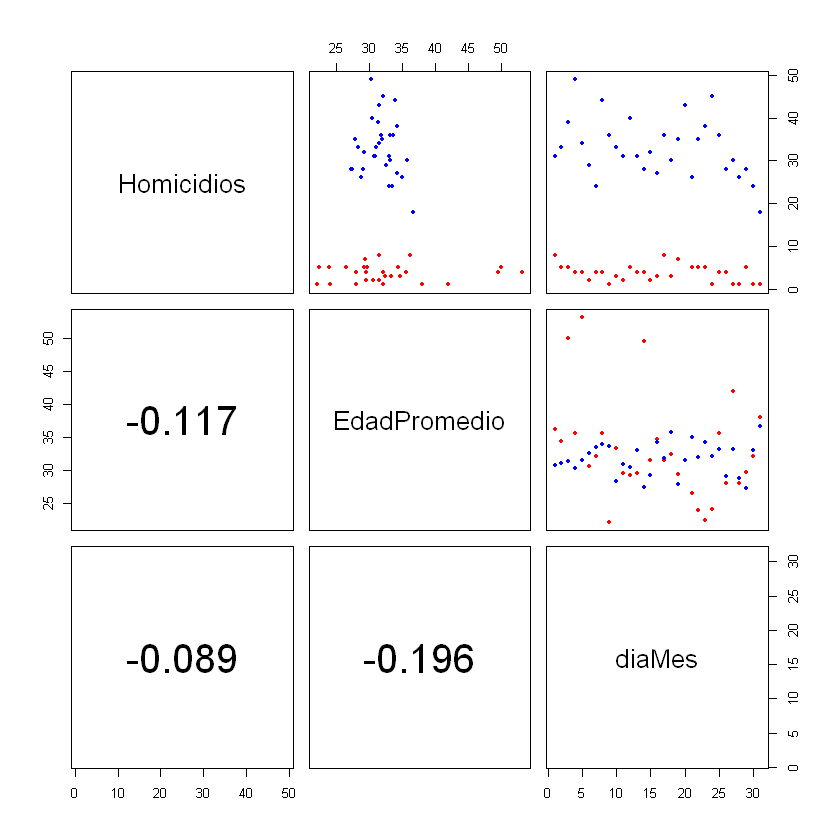

In [22]:
panel.cor <- function(x, y){
    usr <- par("usr"); on.exit(par(usr))
    par(usr = c(0, 1, 0, 1))
    r <- round(cor(x, y), digits=3)
    txt <- paste0("R = ", r)
    text(0.5, 0.5, r,cex = 3)
}
upper.panel<-function(x, y){
  my_cols <- c("red", "blue") 
  points(x,y, pch = 20, col = my_cols[as.numeric(as.factor(Homicidios2017$Sexo))])
}
pairs(Homicidios2017[c("Homicidios","EdadPromedio","diaMes")],upper.panel = upper.panel,lower.panel = panel.cor)

En el diagrama de caja se muestra la cantidad de homicidios respecto al sexo de la víctima. Es claro que la cantidad de víctimas hombres es mucho mayor que la cantidad de víctimas mujeres.

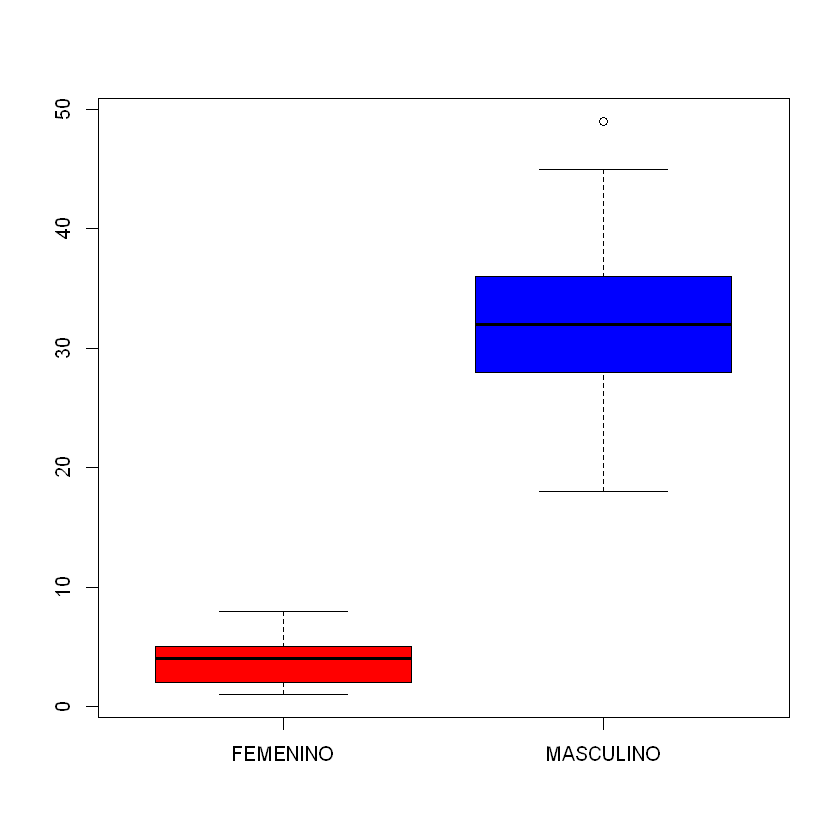

In [23]:
boxplot(Homicidios~Sexo,data=Homicidios2017,col=c("red", "blue"))

In [24]:
modelo.poisson=glm(Homicidios~.,family = poisson(log),data=Homicidios2017)
summary(modelo.poisson)


Call:
glm(formula = Homicidios ~ ., family = poisson(log), data = Homicidios2017)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.04142  -0.91276  -0.03448   0.61020   2.46462  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    1.568056   0.322155   4.867 1.13e-06 ***
diaMes        -0.009038   0.003330  -2.714  0.00665 ** 
SexoMASCULINO  2.180402   0.100693  21.654  < 2e-16 ***
EdadPromedio  -0.003617   0.009185  -0.394  0.69369    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 886.762  on 60  degrees of freedom
Residual deviance:  68.066  on 57  degrees of freedom
AIC: 331.8

Number of Fisher Scoring iterations: 4


Con la construcción del modelo, se observa una reducción sustancial de la devianza residual respecto a la devianza nula. El criterio de información de Akaike es de 331.8. No es el mejor pero corresponde a la mejor aproximación obtenida a partir de los datos. 

La ecuación para el conteo de homicidios queda de la siguiente manera, para víctimas Hombres:

$$Homicidios_M=e^{1.568-0.009diaMes+2.18Sexo[Masculino]-0.003EdadPromedio}$$

Para víctimas mujeres sería

$$Homicidios_F=e^{1.568-0.009diaMes-0.003EdadPromedio}$$

Los gráficos de los residules:

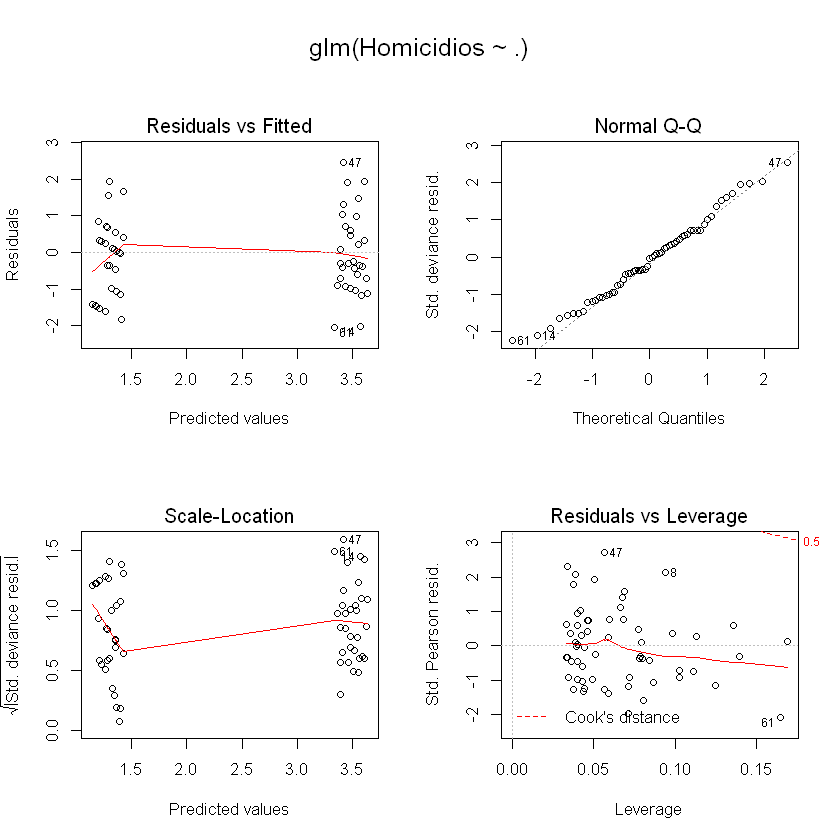

In [25]:
oldpar <- par(oma=c(0,0,3,0), mfrow=c(2,2))
plot(modelo.poisson)
par(oldpar)

Para la validación del modelo se cargan los datos de Homicidios ocurridos en el año 2018.

In [26]:
Homicidios2018 = read_excel("HomicidiosBogota.xlsx",sheet = "H2018")
head(Homicidios2018)

diaMes,Sexo,EdadPromedio,Homicidios
1,FEMENINO,41.75000,4
1,MASCULINO,31.87500,48
2,FEMENINO,31.80000,5
2,MASCULINO,32.81818,44
3,FEMENINO,50.00000,1
3,MASCULINO,31.96774,31


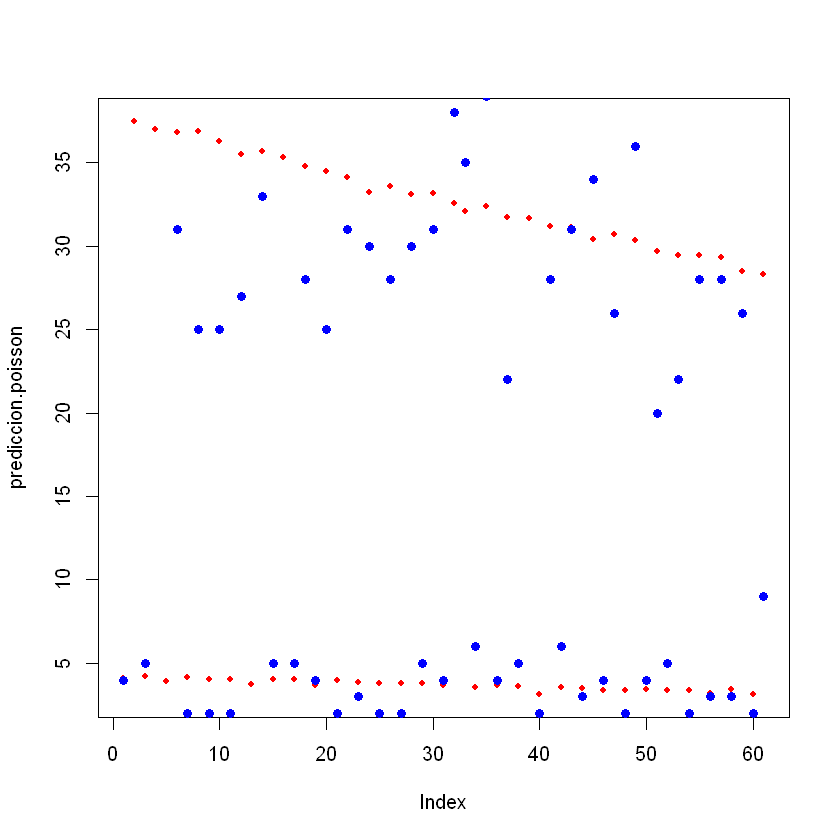

In [27]:
prediccion.poisson=predict(modelo.poisson,newdata = Homicidios2018[,1:3],type = "response")
plot(prediccion.poisson, col="red",pch=20)
points(Homicidios2018$Homicidios,col="blue",pch=19)

En la gráfica se muestra en rojo la predicción realizada por el modelo de Homicidios en 2018, y en azul los homicidios ocurridos realmente en ese año.